In [30]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pickle
import matplotlib.pyplot as plt

In [24]:
# read shapefiles and pickle
# take a long time to read all files...
us_tract_shp = gpd.read_file('../../data/processed_data/us_tract_mainland_shp.geojson')
# flow_16_acs_shp = gpd.read_file('../../data/processed_data/flow_16_acs_mainland_shp.shp')
# flow_20_march_week4_shp = gpd.read_file('../../data/processed_data/flow_20_march_week4_mainland_shp.shp')
# with open('../../data/processed_data/us_tract_adjacency_net.pickle', 'rb') as f:
#     us_tract_net = pickle.load(f)


EOFError: Ran out of input

In [32]:
us_tract_shp.head()

STATEFP COUNTYFP TRACTCE        GEOID  NAME           NAMELSAD  MTFCC  \
0      38      047  972500  38047972500  9725  Census Tract 9725  G5020   
1      38      073  969000  38073969000  9690  Census Tract 9690  G5020   
2      38      009  952400  38009952400  9524  Census Tract 9524  G5020   
3      38      009  952500  38009952500  9525  Census Tract 9525  G5020   
4      38      009  952300  38009952300  9523  Census Tract 9523  G5020   

  FUNCSTAT       ALAND    AWATER  ... hh_worker_2_more pct_worker_2_more  \
0        S  2571326104  47715596  ...              347             39.52   
1        S  1442387838   1962257  ...              299             50.08   
2        S  2255183406  53013501  ...              365             33.42   
3        S  2055808274  21851497  ...              273             31.63   
4        S    10204813         0  ...              407             37.27   

  binge bphigh   chd  diabetes  obesity   lpa  total_pop_cdc  \
0  17.6   39.8  10.1      13.0     36.3  27.9           1990   
1  22.0   34.4   6.8      10.1     36.2  23.1           1511   
2  20.6   38.0   8.5      12.1     34.7  24.2           2279   
3  21.7   36.1   7.8      11.0     34.3  24.4           1861   
4  20.4   36.3   8.8      11.4     32.2  26.0           2289   

                                            geometry  
0  POLYGON ((-99.91742 46.34976, -99.91718 46.355...  
1  POLYGON ((-98.03491 46.36969, -98.03491 46.369...  
2  POLYGON ((-100.97129 48.95309, -100.96864 48.9...  
3  POLYGON ((-101.49674 48.99490, -101.49674 48.9...  
4  POLYGON ((-100.46792 48.80690, -100.46791 48.8...  

[5 rows x 66 columns]

In [35]:
# sw: Ahhh...shapefiles do not allow the string longer than ten characters. 
# sw: How to keep the full variable names?
us_tract_shp.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'layer', 'path',
       'geoid_x', 'pop', 'households', 'male', 'male_ratio', 'female',
       'female_ratio', 'median_age', 'white', 'black', 'asian', 'other_race',
       'white_ratio', 'black_ratio', 'asian_ratio', 'other_race_ratio',
       'income', 'pop_no_inc', 'pop_inc_10k', 'pop_inc_10k_15k',
       'pop_inc_15k_25k', 'pop_inc_25k_35k', 'pop_inc_35k_50k',
       'pop_inc_50k_65k', 'pop_inc_65k_75k', 'pop_inc_75k', 'geoid_y',
       'est_pmiles', 'est_ptrp', 'est_vmiles', 'est_vtrp', 'total_pop_bts',
       'households_bts', 'median_hh_inc_bts', 'hh_veh_0', 'hh_veh_1',
       'hh_veh_2_more', 'pct_veh_0', 'pct_veh_1', 'pct_veh_2_more',
       'hh_worker_1', 'pct_worker_1', 'hh_worker_2_more', 'pct_worker_2_more',
       'binge', 'bphigh', 'chd', 'diabetes', 'obesity', 'lpa', 'total_pop_cdc',
       'geometry'],
      dtype='object')

In [37]:
# shapes
print(us_tract_shp.shape)
# print(flow_16_acs_shp.shape)
# print(flow_20_march_week4_shp.shape)

(71567, 66)


## Visualize the values for US census tracts

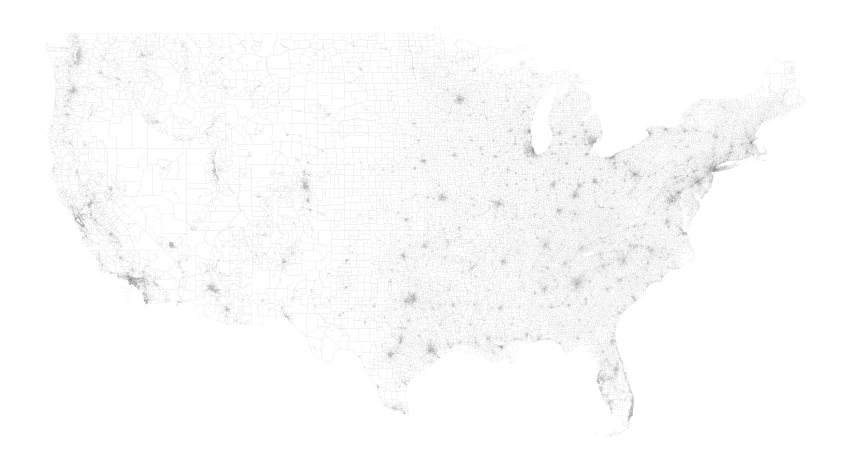

In [38]:
# basic ct figure
fig, ax = plt.subplots(figsize=(15,10))
us_tract_shp.plot(facecolor='w', edgecolor='k', linewidth = 0.02, ax = ax)
ax.set_axis_off()
fig.savefig('../../output/us_census_tracts.png')

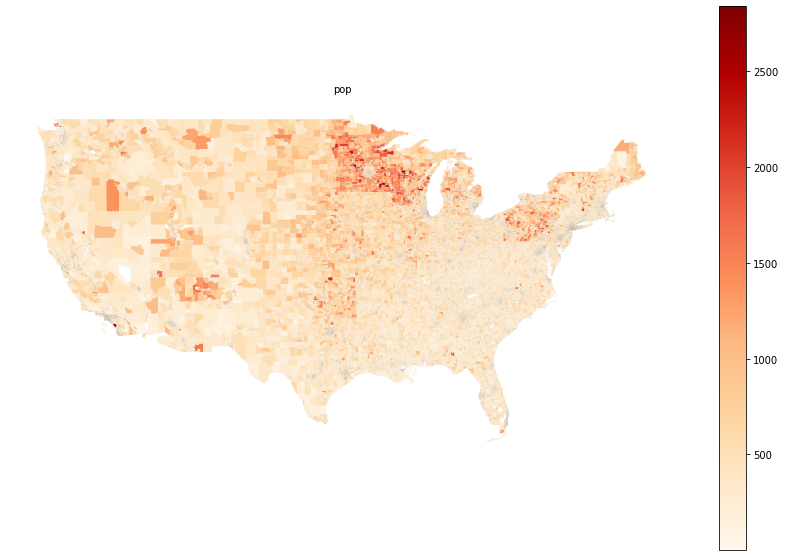

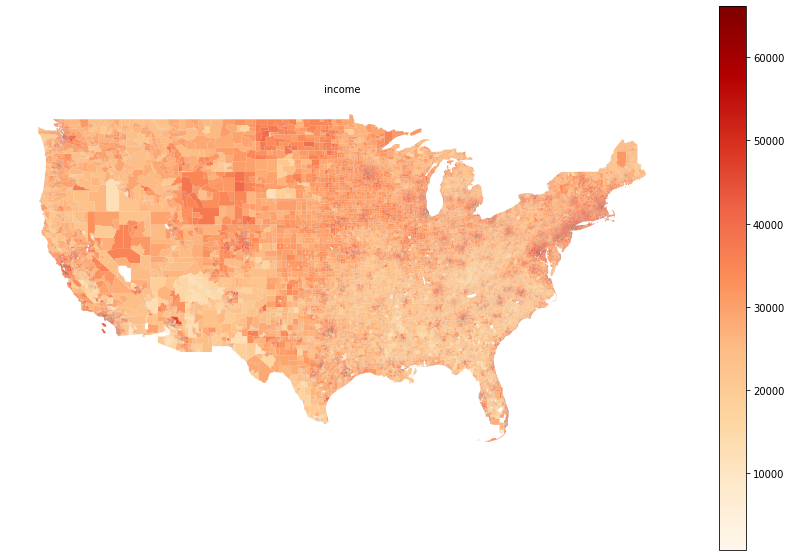

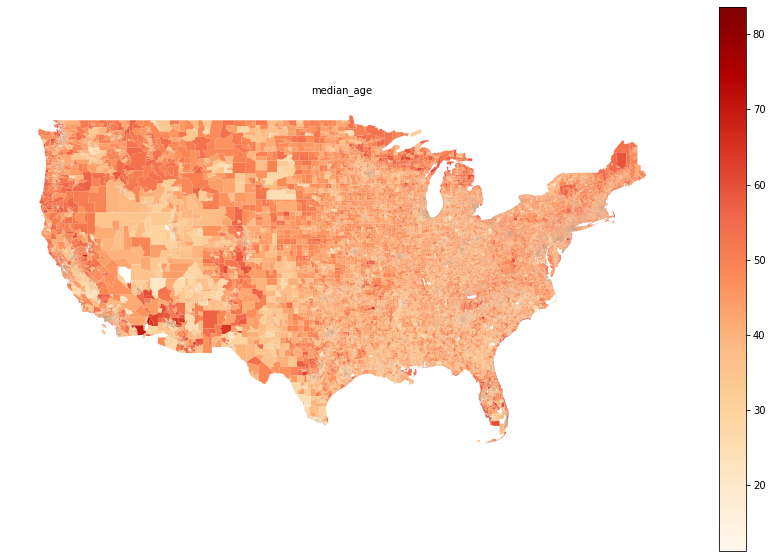

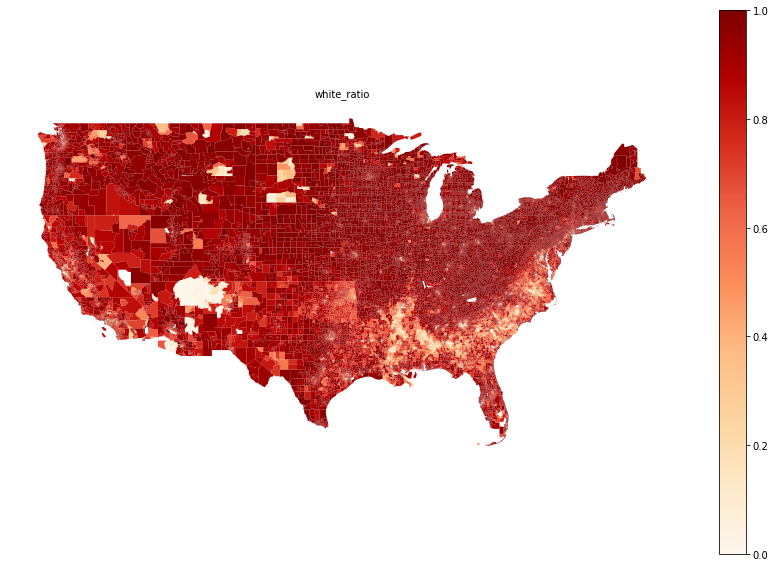

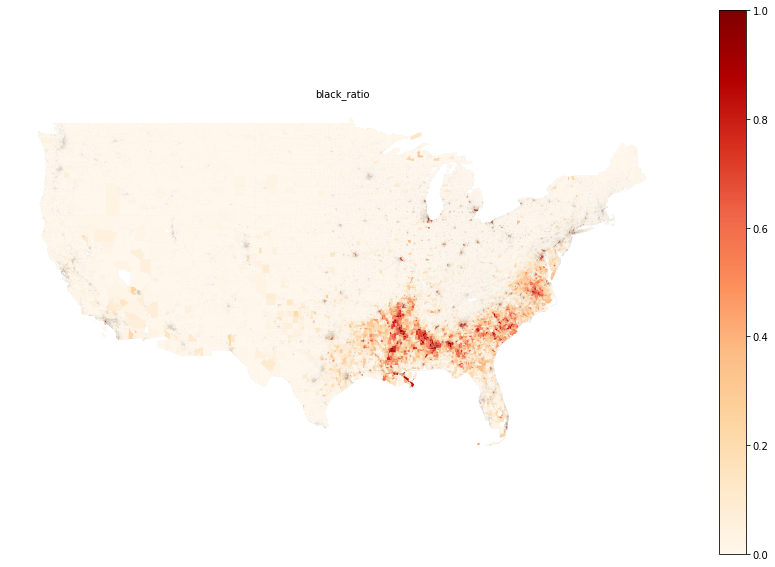

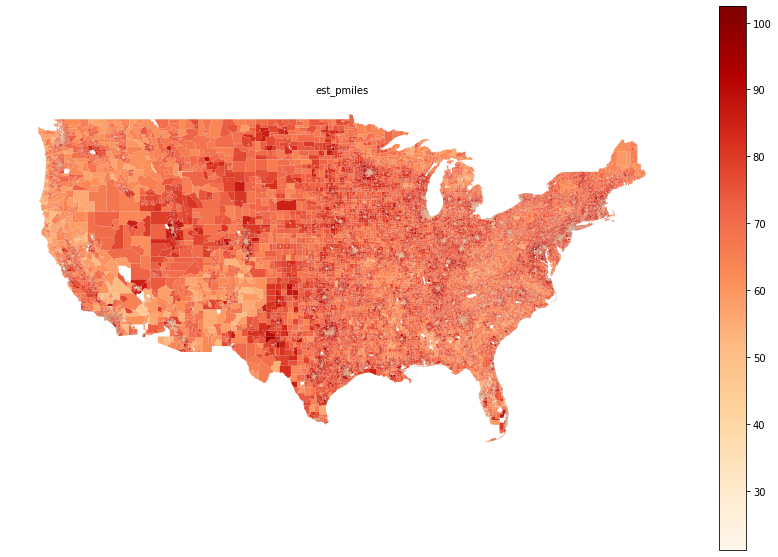

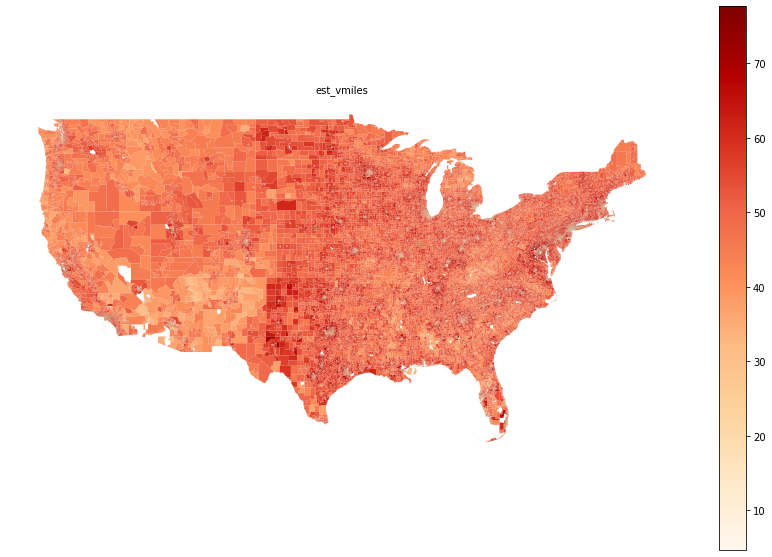

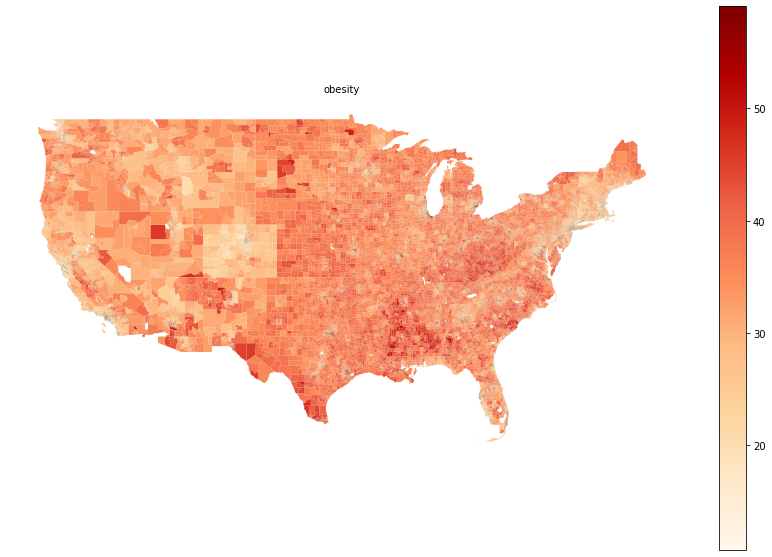

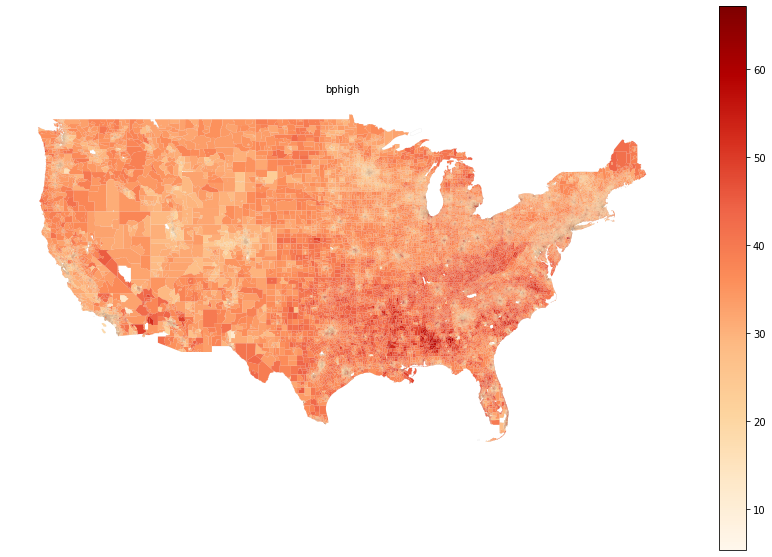

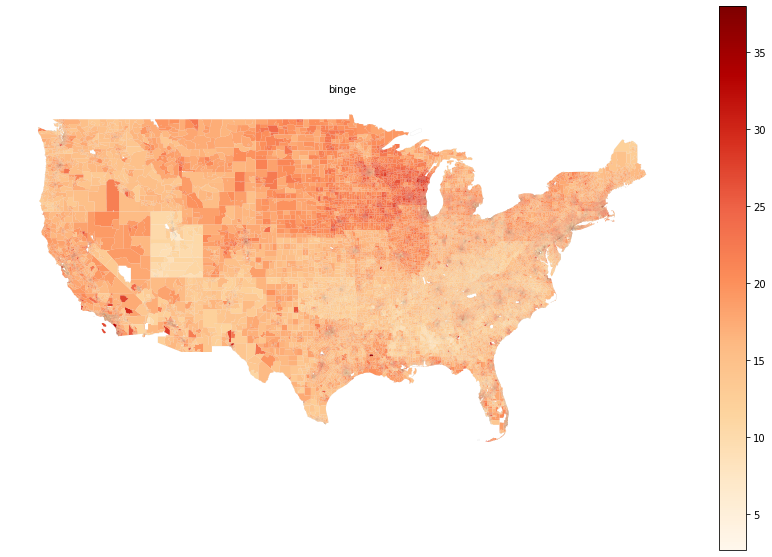

In [39]:
# ct + indicators
# pop, median_age, white_rati, black_rati, est_pmiles, est_vmiles, obesity, bphigh, binge. 
# visualization takes time... ; (
var_list = ['pop','income','median_age','white_ratio','black_ratio','est_pmiles','est_vmiles','obesity','bphigh','binge']

for var in var_list:
    fig, ax = plt.subplots(figsize=(15,10))
    us_tract_shp.plot(facecolor='w', edgecolor='k', linewidth = 0.02, ax = ax)
    us_tract_shp.plot(column=var, cmap='OrRd', legend=True, ax = ax)
    ax.set_axis_off()
    ax.set_title(var, fontsize=10)
    fig.savefig('../../output/us_census_tracts_'+var+'.png')


# MA and Cook

In [40]:
# MA and Cook
us_tract_MA_shp = gpd.read_file('../../data/processed_data/us_tract_MA_shp.geojson')
us_tract_Cook_shp = gpd.read_file('../../data/processed_data/us_tract_Cook_shp.geojson')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1, 'pop_density')

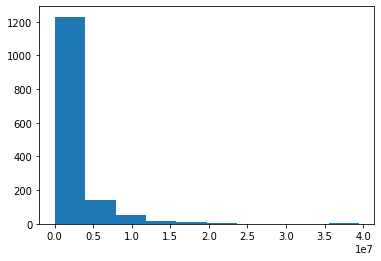

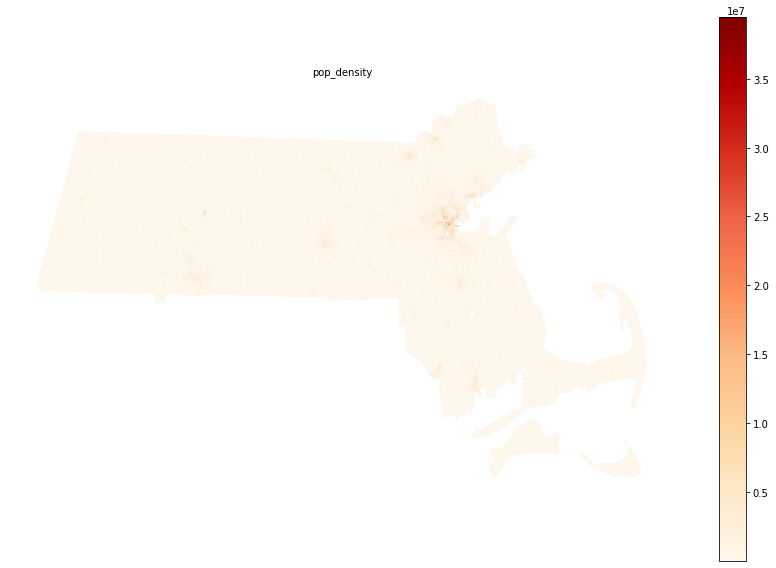

In [52]:
# check the pop variable...it seems wrong.
# However, pop seems fine - census tract definition is adjusted. 
us_tract_MA_shp['pop_density']=us_tract_MA_shp['pop']/us_tract_MA_shp.area
us_tract_MA_shp['pop_density'].describe()
plt.hist(us_tract_MA_shp['pop_density'])

fig, ax = plt.subplots(figsize=(15,10))
us_tract_MA_shp.plot(facecolor='w', edgecolor='k', linewidth = 0.02, ax = ax)
us_tract_MA_shp.plot(column='pop_density', cmap='OrRd', legend=True, ax = ax)
ax.set_axis_off()
ax.set_title("pop_density", fontsize=10)
# fig.savefig('../../output/us_census_MA_tracts_'+var+'.png')


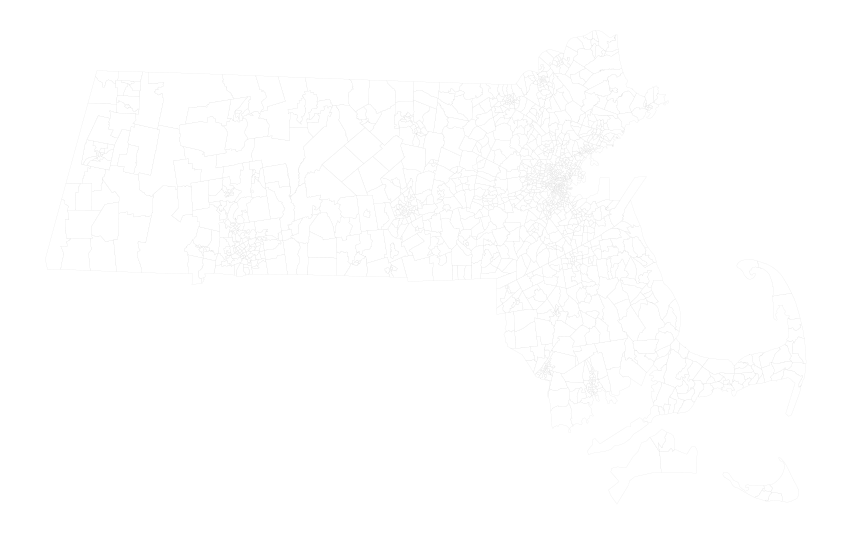

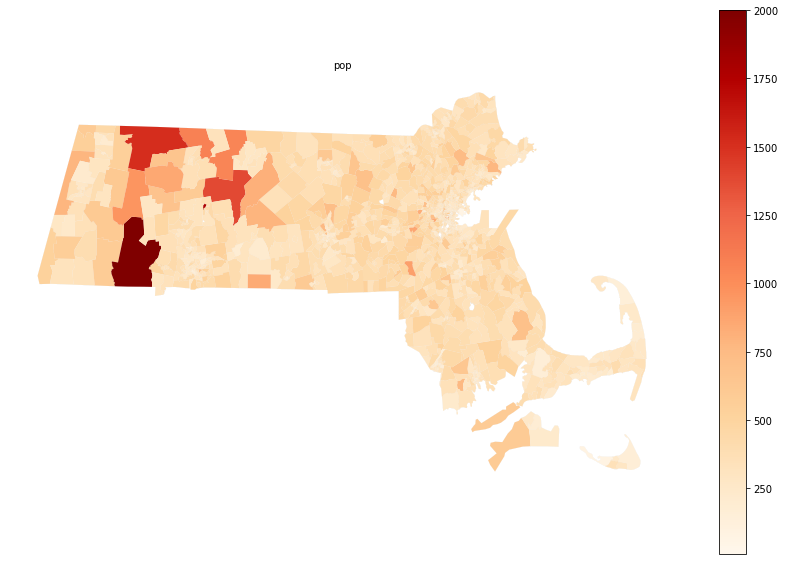

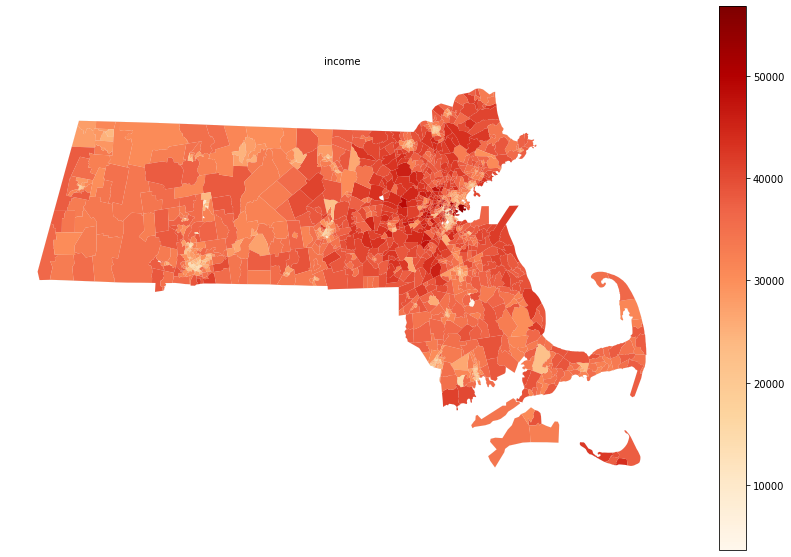

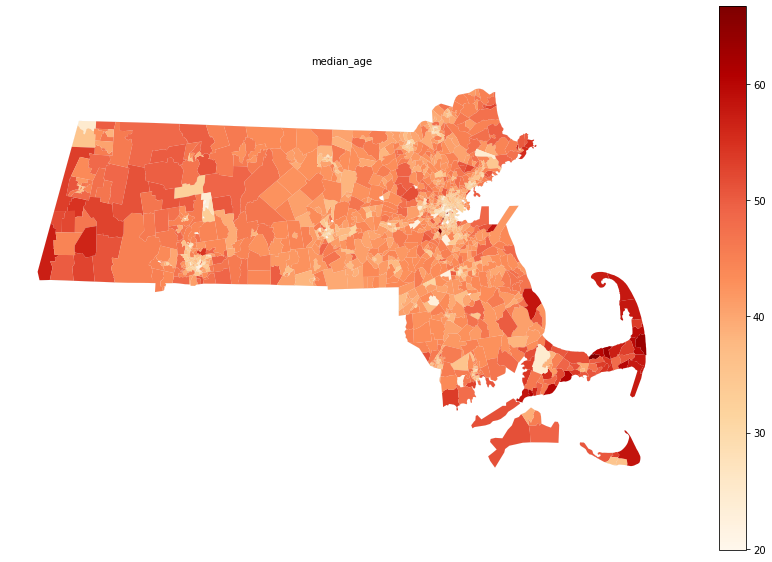

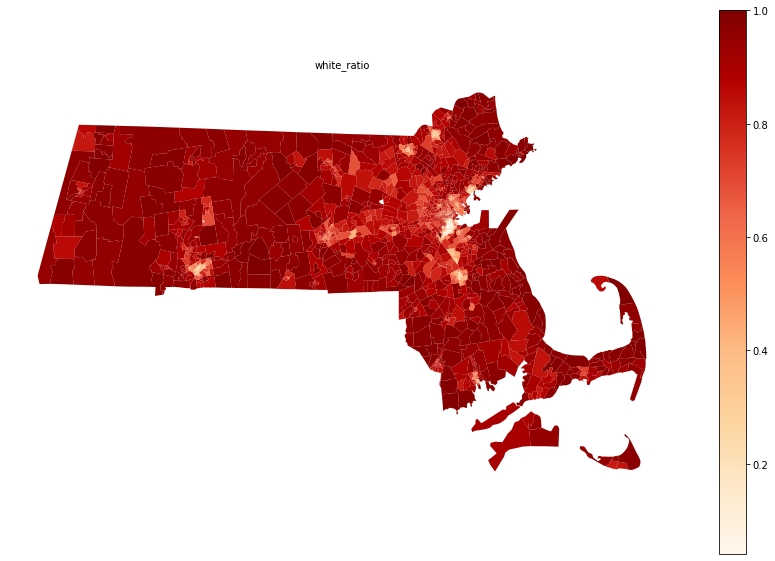

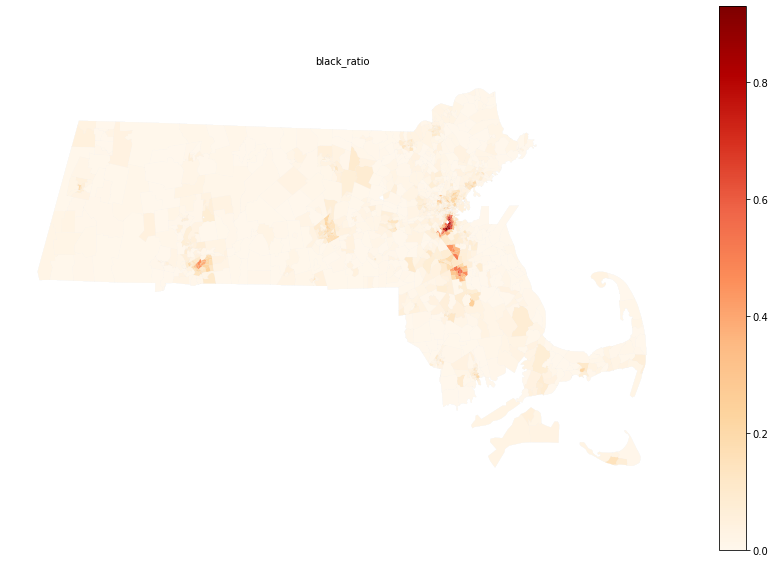

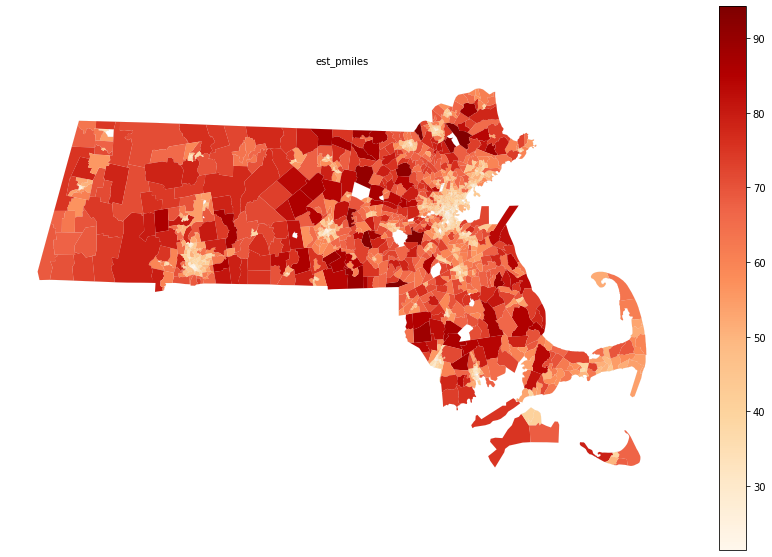

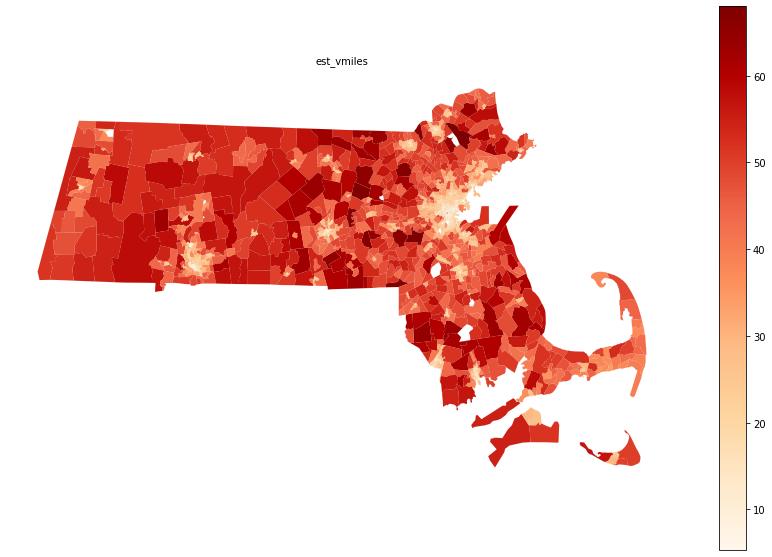

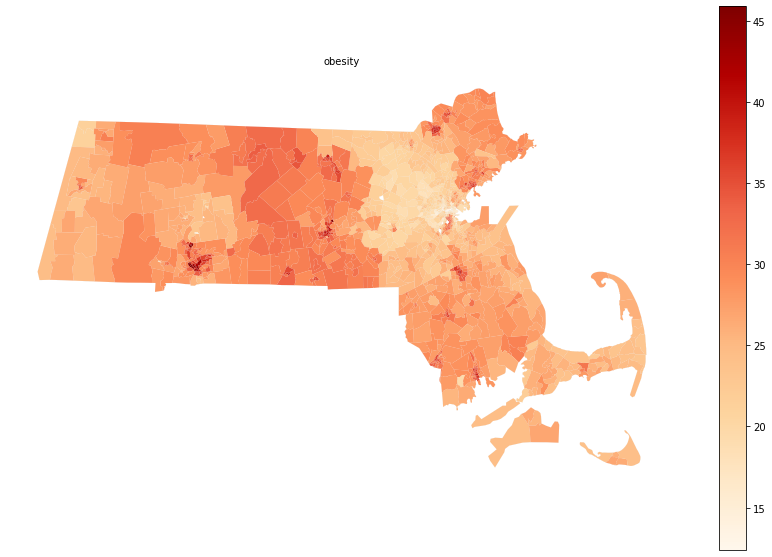

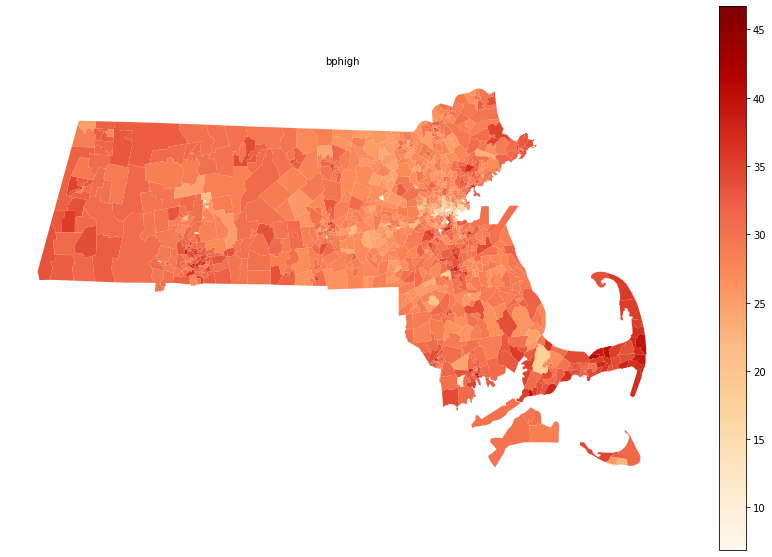

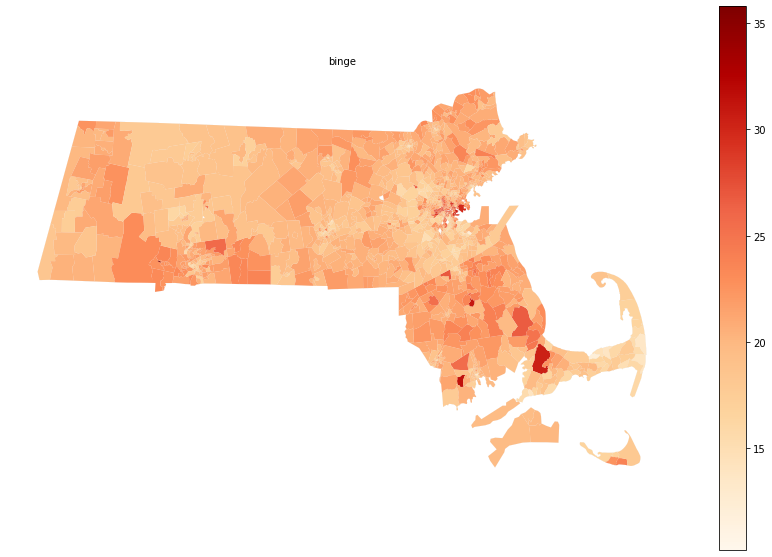

In [41]:
# MA
fig, ax = plt.subplots(figsize=(15,10))
us_tract_MA_shp.plot(facecolor='w', edgecolor='k', linewidth = 0.02, ax = ax)
ax.set_axis_off()
fig.savefig('../../output/us_census_MA_tracts.png')

var_list = ['pop','income','median_age','white_ratio','black_ratio','est_pmiles','est_vmiles','obesity','bphigh','binge']

for var in var_list:
    fig, ax = plt.subplots(figsize=(15,10))
    us_tract_MA_shp.plot(facecolor='w', edgecolor='k', linewidth = 0.02, ax = ax)
    us_tract_MA_shp.plot(column=var, cmap='OrRd', legend=True, ax = ax)
    ax.set_axis_off()
    ax.set_title(var, fontsize=10)
    fig.savefig('../../output/us_census_MA_tracts_'+var+'.png')


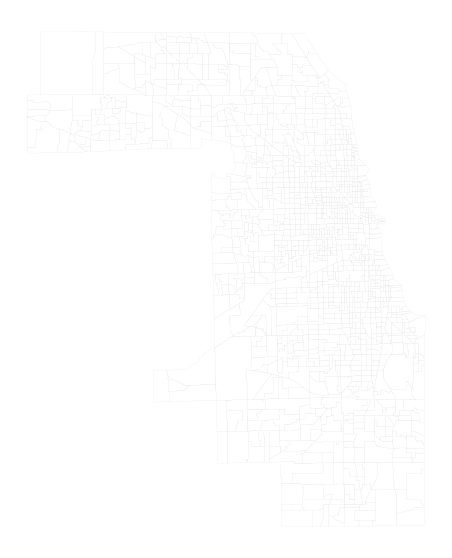

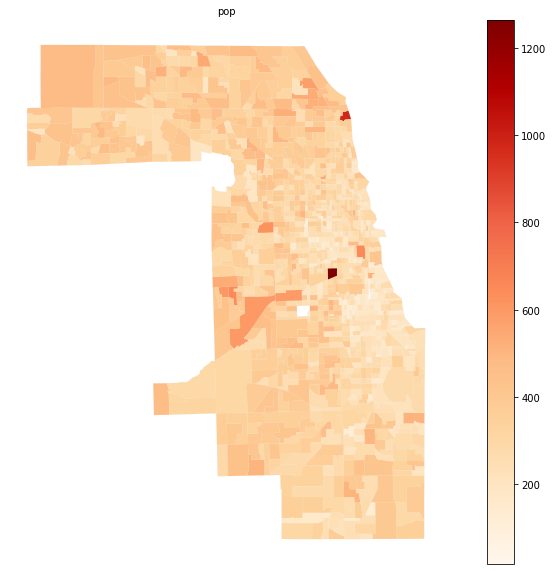

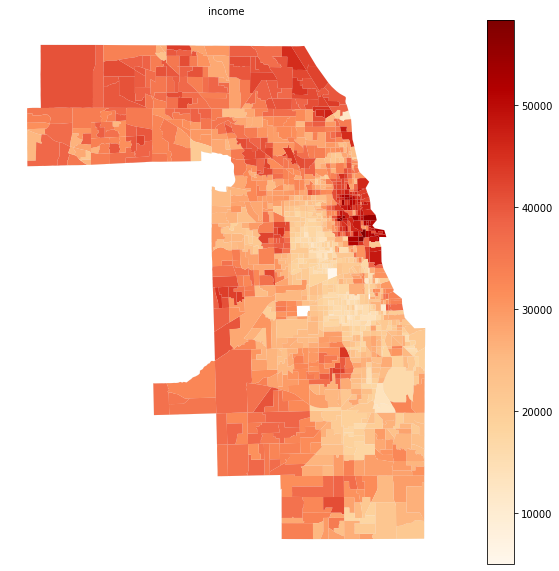

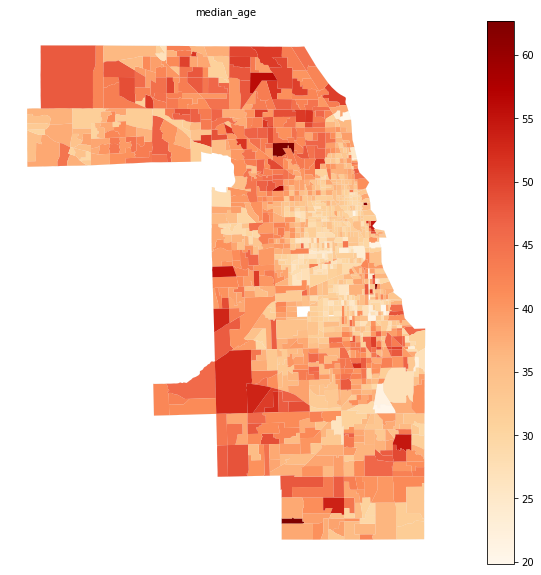

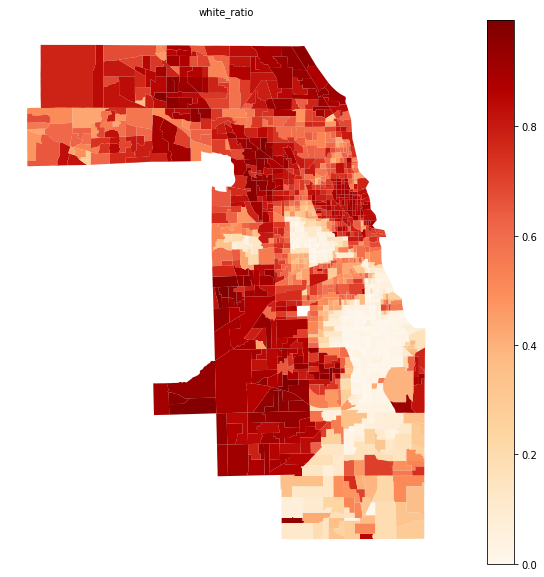

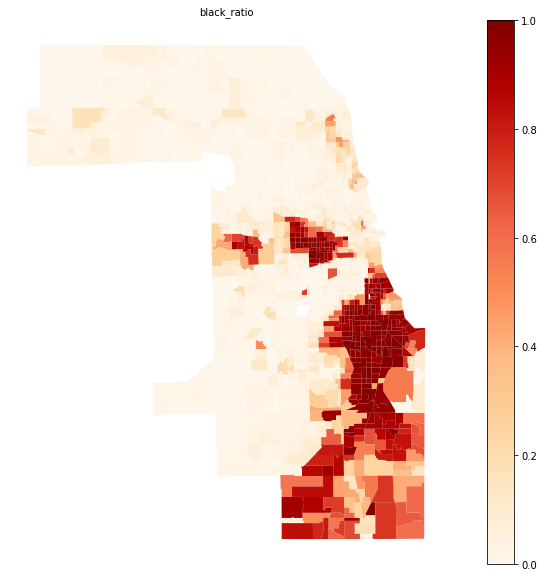

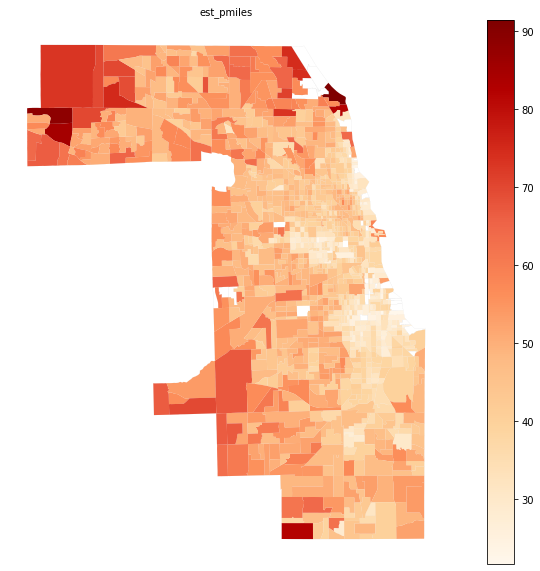

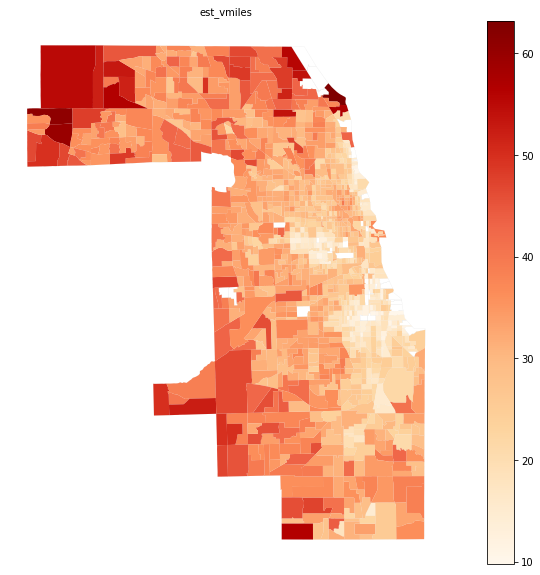

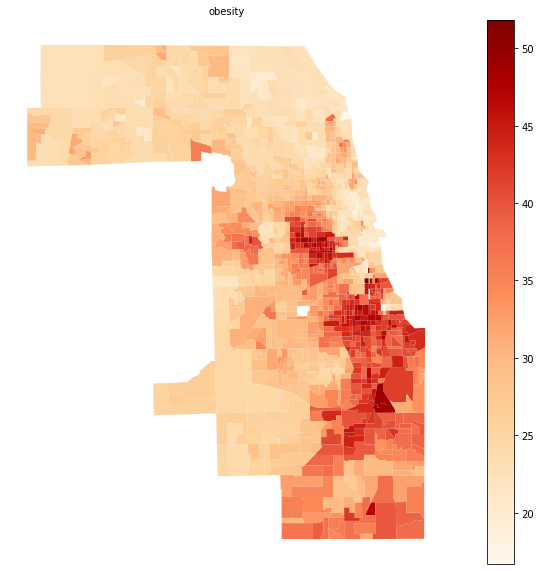

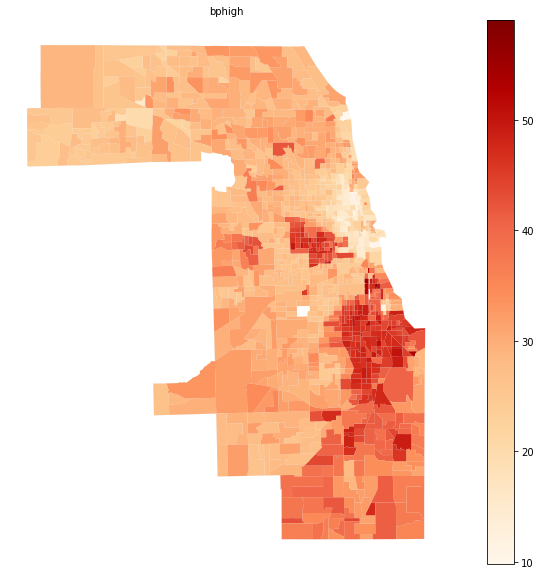

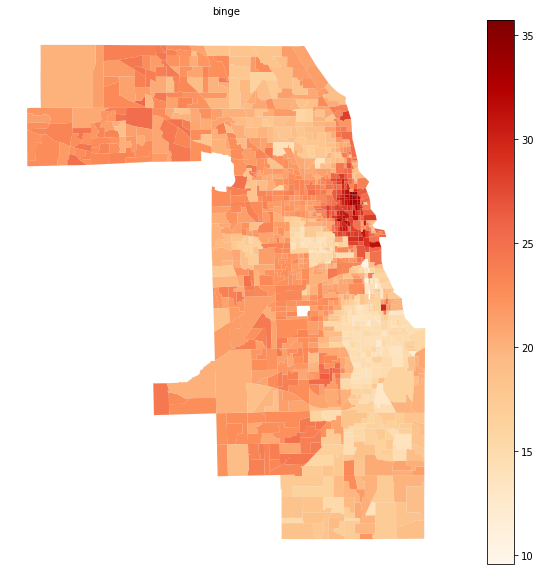

In [42]:
# Cook
fig, ax = plt.subplots(figsize=(15,10))
us_tract_Cook_shp.plot(facecolor='w', edgecolor='k', linewidth = 0.02, ax = ax)
ax.set_axis_off()
fig.savefig('../../output/us_census_Cook_tracts.png')

var_list = ['pop','income','median_age','white_ratio','black_ratio','est_pmiles','est_vmiles','obesity','bphigh','binge']

for var in var_list:
    fig, ax = plt.subplots(figsize=(15,10))
    us_tract_Cook_shp.plot(facecolor='w', edgecolor='k', linewidth = 0.02, ax = ax)
    us_tract_Cook_shp.plot(column=var, cmap='OrRd', legend=True, ax = ax)
    ax.set_axis_off()
    ax.set_title(var, fontsize=10)
    fig.savefig('../../output/us_census_Cook_tracts_'+var+'.png')
